In [81]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Admin\Downloads\movies.csv')

In [118]:
# Business Goals:

# Does high correlation in Budget mean high Gross Income?
# Does high correlation in Company mean high Gross Income?

df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime yearcorrect  
3203    309                   Daybreak     85.0        Octo  
272    2270           Embassy Pictures     85.0        Marc  
3681   2554  Copperheart Entertainment    108.0        May   
2434   2970           Trimark Pictures     97.0        June  
5640   5073           Two Prong Lesson     96.0        Janu

In [83]:
# Finding if there is any data mising

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [85]:
df = df.dropna()

In [119]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime  yearcorrect  
3203    309                   Daybreak     85.0         1997  
272    2270           Embassy Pictures     85.0         1982  
3681   2554  Copperheart Entertainment    108.0         2001  
2434   2970           Trimark Pictures     97.0         1994  
5640   5073           Two Prong Lesson     96.0         2015

In [49]:
# Data types for our columns

In [87]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [88]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [120]:
df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime  yearcorrect  
3203    309                   Daybreak     85.0         1997  
272    2270           Embassy Pictures     85.0         1982  
3681   2554  Copperheart Entertainment    108.0         2001  
2434   2970           Trimark Pictures     97.0         1994  
5640   5073           Two Prong Lesson     96.0         2015

In [89]:
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [121]:
df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime  yearcorrect  
3203    309                   Daybreak     85.0         1997  
272    2270           Embassy Pictures     85.0         1982  
3681   2554  Copperheart Entertainment    108.0         2001  
2434   2970           Trimark Pictures     97.0         1994  
5640   5073           Two Prong Lesson     96.0         2015

In [90]:
df= df.sort_values(by=['gross'], inplace=False, ascending=True)

In [91]:
pd.set_option('display.max_rows', None )

In [92]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
724                                      Zoetrope Studios
2213                                   Zeta Entertainment
4829                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [122]:
df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime  yearcorrect  
3203    309                   Daybreak     85.0         1997  
272    2270           Embassy Pictures     85.0         1982  
3681   2554  Copperheart Entertainment    108.0         2001  
2434   2970           Trimark Pictures     97.0         1994  
5640   5073           Two Prong Lesson     96.0         2015

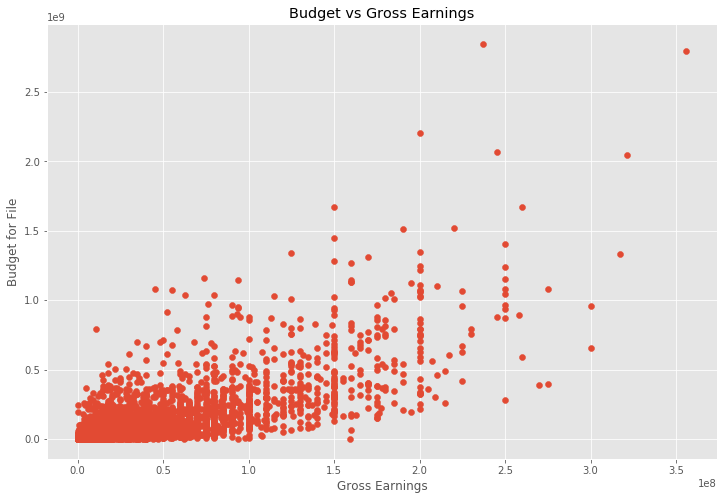

In [57]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])



plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for File')

plt.show()

In [32]:
df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime yearcorrect  
3203    309                   Daybreak     85.0        Octo  
272    2270           Embassy Pictures     85.0        Marc  
3681   2554  Copperheart Entertainment    108.0        May   
2434   2970           Trimark Pictures     97.0        June  
5640   5073           Two Prong Lesson     96.0        Janu

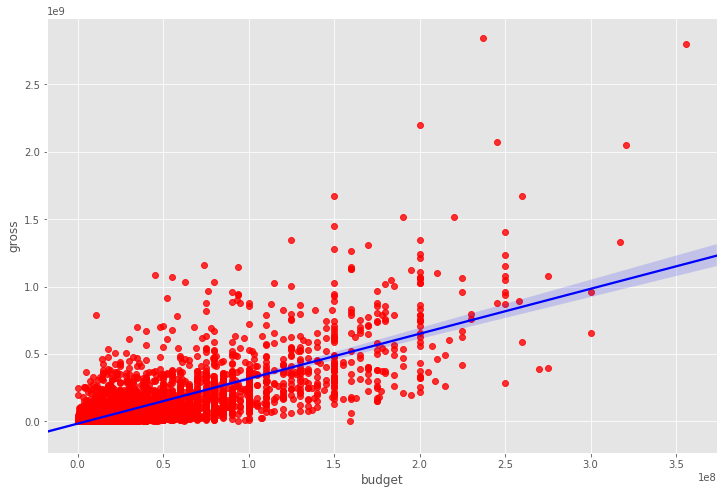

In [60]:
# Plot Budget vs gross uing seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws= {"color":"blue"})

In [69]:
# Let's start looking at correlation

df.corr(method='pearson') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [64]:
# High correlation between budget and gross
# I was right

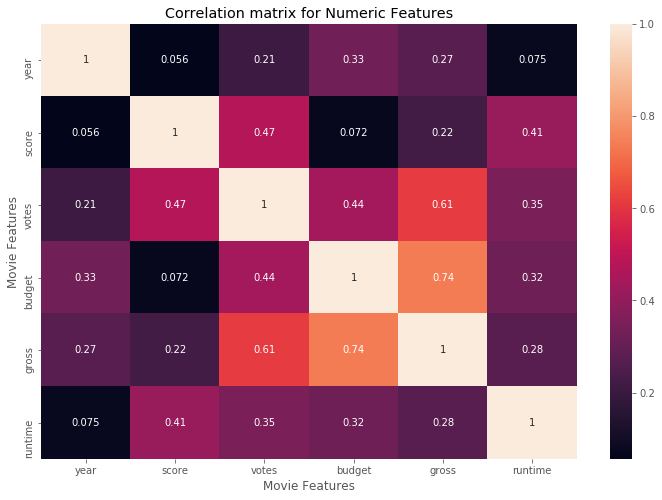

In [71]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [72]:
# Looks at Company

df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime yearcorrect  
3203    309                   Daybreak     85.0        Octo  
272    2270           Embassy Pictures     85.0        Marc  
3681   2554  Copperheart Entertainment    108.0        May   
2434   2970           Trimark Pictures     97.0        June  
5640   5073           Two Prong Lesson     96.0        Janu

In [123]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
3203  4966       5      4  1997      2152    5.7   5800.0       651     161   
272   2909       6      9  1982      1525    3.9   2300.0       261      55   
3681  1595       3      6  2000      1721    6.8  43000.0       952    1683   
2434  2969       5      0  1993      1467    4.5   1900.0      1805    3102   
5640  3794       6      6  2009       890    5.8   3500.0       585    2924   

      star  country    budget  gross  company  runtime  yearcorrect  
3203  1811       47  15000000    309      504     85.0         1997  
272   1473       47    800000   2270      582     85.0         1982  
3681   527        6   5000000   2554      466    108.0         2001  
2434   186       47   5000000   2970     1376     97.0         1994  
5640  1498       47   3000000   5073     1385     96.0         2015

In [124]:
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
3203  4966       5      4  1997      2152    5.7   5800.0       651     161   
272   2909       6      9  1982      1525    3.9   2300.0       261      55   
3681  1595       3      6  2000      1721    6.8  43000.0       952    1683   
2434  2969       5      0  1993      1467    4.5   1900.0      1805    3102   
5640  3794       6      6  2009       890    5.8   3500.0       585    2924   

      star  country    budget  gross  company  runtime  yearcorrect  
3203  1811       47  15000000    309      504     85.0         1997  
272   1473       47    800000   2270      582     85.0         1982  
3681   527        6   5000000   2554      466    108.0         2001  
2434   186       47   5000000   2970     1376     97.0         1994  
5640  1498       47   3000000   5073     1385     96.0         2015

In [125]:
df.head()

name     rating   genre  year  \
3203                  Trojan War      PG-13  Comedy  1997   
272                     Parasite          R  Horror  1982   
3681                Ginger Snaps  Not Rated   Drama  2000   
2434  Philadelphia Experiment II      PG-13  Action  1993   
5640                 Tanner Hall          R   Drama  2009   

                            released  score    votes             director  \
3203        October 1, 1997 (Brazil)    5.7   5800.0         George Huang   
272   March 12, 1982 (United States)    3.9   2300.0         Charles Band   
3681           May 11, 2001 (Canada)    6.8  43000.0         John Fawcett   
2434      June 4, 1994 (South Korea)    4.5   1900.0     Stephen Cornwell   
5640       January 15, 2015 (Sweden)    5.8   3500.0  Francesca Gregorini   

                       writer             star        country    budget  \
3203                Andy Burg     Will Friedle  United States  15000000   
272             Alan J. Adler  Robert Glaudini  United States    800000   
3681             Karen Walton    Emily Perkins         Canada   5000000   
2434       Wallace C. Bennett     Brad Johnson  United States   5000000   
5640  Tatiana von Fürstenberg      Rooney Mara  United States   3000000   

      gross                    company  runtime  yearcorrect  
3203    309                   Daybreak     85.0         1997  
272    2270           Embassy Pictures     85.0         1982  
3681   2554  Copperheart Entertainment    108.0         2001  
2434   2970           Trimark Pictures     97.0         1994  
5640   5073           Two Prong Lesson     96.0         2015

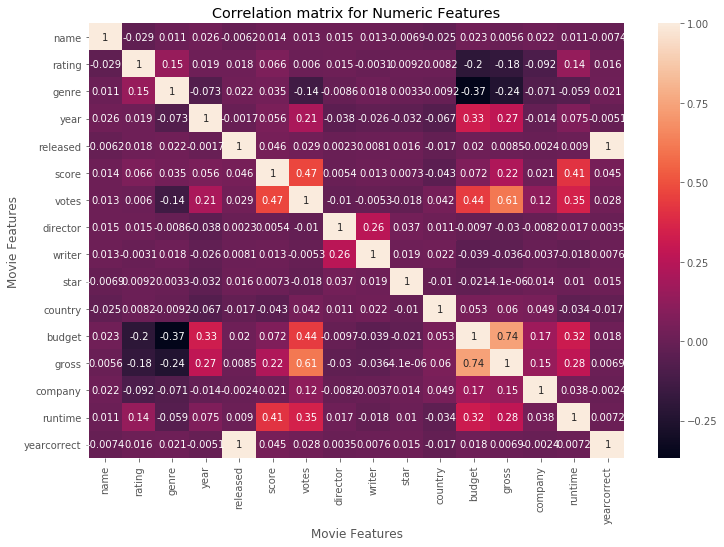

In [108]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [109]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect -0.007371  0.015532  0.021306 -0.005073  0.996181  0.045136   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.027535  0.003497  0.007594  0.014919 -0.016957  0.018328   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850    -0.007371  
rating      -0.181906 -0.092357  0.140792     0.015532  
genre       -0.244101 -0.071334 -0.059237     0.021306  
year         0.274321 -0.014333  0.075077    -0.005073  
released     0.008501 -0.002407  0.008975     0.996181  
score        0.222556  0.020656  0.414068     0.045136  
votes        0.614751  0.118470  0.352303     0.027535  
director    -0.029560 -0.008223  0.017433     0.003497  
writer      -0.035885 -0.003697 -0.017561     0.007594  
star        -0.000004  0.014082  0.010108     0.014919  
country      0.060078  0.048569 -0.034477    -0.016957  
budget       0.740247  0.170235  0.318695     0.018328  
gross        1.000000  0.149553  0.275796     0.006873  
company      0.149553  1.000000  0.037585    -0.002361  
runtime      0.275796  0.037585  1.000000     0.007167  
yearcorrect  0.006873 -0.002361  0.007167     1.000000

In [114]:
correlation_mat= df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.007371
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [115]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
country      year          -0.066748
year         country       -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     year          -0.038354
year         director      -0.038354
gross        writer        -0.035885
w

In [117]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       0.996181
released     yearcorrect    0.996181
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes & budget have highest correlation to gross earings
# Company has low correlation
# Having High Correlation with Company does not Correlate to high Gross Profit.